In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('/kaggle/input/electric-motor-temperature/measures_v2.csv')

In [4]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [4]:
df.describe(include='all')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [5]:
df.isna().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

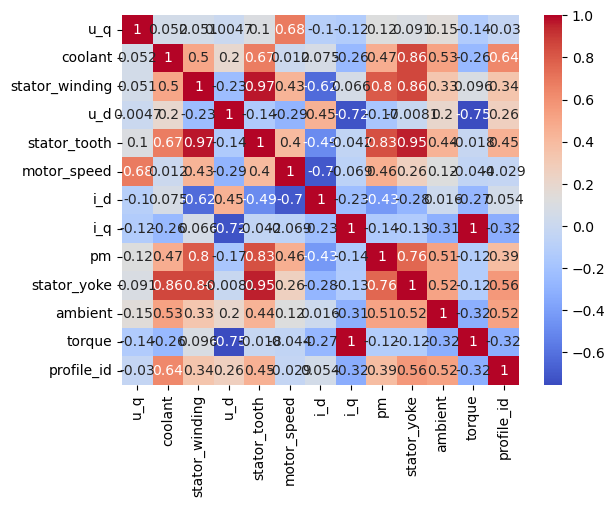

In [6]:
corr = df.corr()
sns.heatmap(corr,annot= True,cmap ='coolwarm')
plt.show()

Now we want to predict the moter speed with its corresponding values as input based on the correlation map the better the correlation the better the attributes depend on each other 

In [3]:
X= df.drop(['i_d','u_d','i_q','motor_speed'],axis=1)
y=df['motor_speed']

from sklearn

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scled = scaler.fit_transform(X_train)
X_test_scled = scaler.fit_transform(X_test)


In [6]:

from xgboost.sklearn import XGBRegressor

In [8]:
xg_reg = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    min_child_weight=3,
    subsample=0.7,
    colsample_bytree=0.7
)

# Fit the XGRegressor model to the training data
xg_reg.fit(X_train_scled, y_train)

# Make predictions on the training set
y_pred_train = xg_reg.predict(X_train_scled)

# Print the RMSE score of the predictions on the training set
from sklearn.metrics import mean_squared_error
print("RMSE score on the training set: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))


RMSE score on the training set:  520.5463345098085


In [9]:
yhat=xg_reg.predict(X_test_scled)

In [14]:
yhat_train = xg_reg.predict(X_train_scled)

In [10]:
yhat

array([5331.1997 , 4177.871  , 3234.1145 , ..., 3899.0547 ,   90.44302,
       3619.709  ], dtype=float32)

In [11]:
y_test

294684     4999.950684
668769     4999.958502
1326035    4576.694931
879218      501.136705
75406      4499.962891
              ...     
403139      100.037041
484957     1499.988037
1153239    3999.958199
1065611      -0.000203
218719     3499.964111
Name: motor_speed, Length: 266164, dtype: float64

In [15]:
yhat_train

array([4812.3667, 3554.7668, 1646.7789, ..., 2042.3271, 1923.8026,
       2023.7297], dtype=float32)

In [16]:
y_train

1143828    5193.803338
213758     3499.968750
1286043     795.848780
1076280    5183.784198
471043     1499.985718
              ...     
110268       99.960388
259178     3499.980225
131932     1999.976929
671155     1489.375690
121958     1999.979370
Name: motor_speed, Length: 1064652, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error
print("RMSE score on the test set: ", np.sqrt(mean_squared_error(y_test, yhat)))
print("RMSE score on the training set: ", np.sqrt(mean_squared_error(y_train, yhat_train)))


RMSE score on the test set:  551.2101022232454
RMSE score on the training set:  520.5463345098085
